	m_fit	2.0283
	c_fit	0.8637
reduced chi2	2.1682


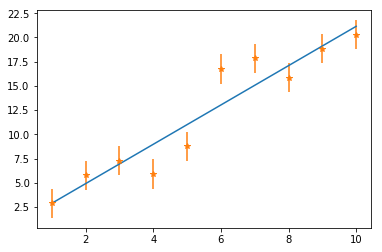

In [3]:
%matplotlib inline
from scipy.stats import norm
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt
#

# generate data
m=2.0 # true gradient
c=1.0 # true intercept
n=10 # number of points

# define a model for fitting and plotting below
def linear_model(x,m,c):
    """Linear function, 1st arg = array of x, 2nd gradient, 3rd intercept"""
    return m*x + c

# make data to fit
x = np.linspace(1,10,n) # n points equally spaced from 0 to 10
y_true = linear_model(x,m,c) # true y values
y_err = np.ones(n)*1.5 # constant errors on each point
y = y_true + y_err*norm.rvs(size=n) # add a random error to each point: this is the "measured" data

m_fit = 0. # first guess of m
c_fit = 0. # first guess of c

# use curve_fit to fit the data to the function provided
# and optmise to the closest set of parameters
# input is the function to be fitted, x,y,sigma for data and the first guess values of the parameters
# output is: popt = best solution, pcov = covariance matrix
popt, pcov = curve_fit(linear_model,x,y,sigma=y_err,p0=[m_fit,c_fit]) 
(m_fit,c_fit) = popt
print("\tm_fit\t{:6.4f}".format(m_fit))
print("\tc_fit\t{:6.4f}".format(c_fit))

# cacluate the chi2 = sum ((y_data - y_fit)/y_err)**2
chi2 = np.sum( ((y-linear_model(x,m_fit,c_fit))/y_err)**2 )
print("reduced chi2\t{:6.4f}".format(chi2/(n-2)))

# plot data and fitted line
xplot = np.linspace(1,10,100) # 100 points equally spaced from 0 to 10
yplot = linear_model(xplot,m_fit,c_fit)
plt.plot(xplot,yplot)
plt.errorbar(x,y,y_err,fmt='*')
plt.show()